<a href="https://colab.research.google.com/github/zekaemo/Implementasi-Polinomial_Metode-Numerik/blob/main/Interpolasi_Newton_Zeka_Emo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [7]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

In [21]:
x = np.array([5, 10, 15, 20, 25, 30, 35, 40])
y = np.array([40, 30, 25, 40, 18, 20, 22, 15])

# cari nilai selisih terbagi
dd= divided_diff(x, y) [0, :]
dd

array([ 4.00000000e+01, -2.00000000e+00,  1.00000000e-01,  2.00000000e-02,
       -4.80000000e-03,  5.06666667e-04, -3.49333333e-05,  1.76761905e-06])

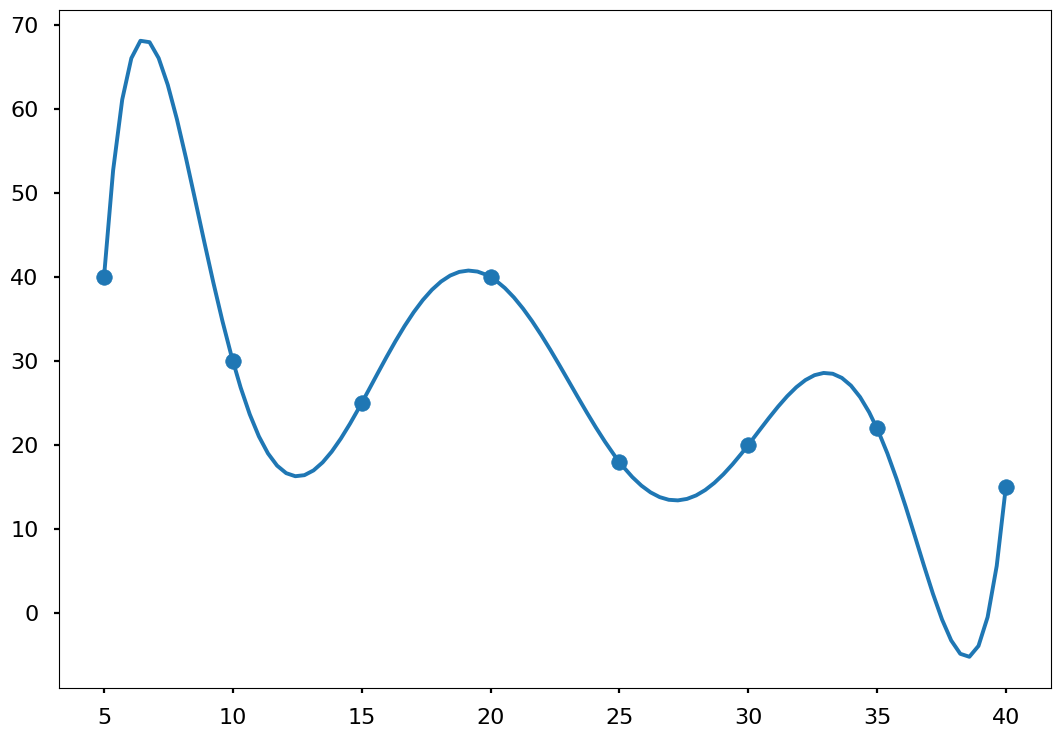

In [35]:
# membuat garis interpolasi
x_garis = np.linspace(5, 40, 100)
y_garis = [newton_poly(dd,x, point) for point in x_garis]

plt.scatter(x, y)
plt.plot(x_garis, y_garis)

In [34]:
# deployment
x_dep= np.array ([8, 13, 18, 23, 28, 33, 38])
y_dep= newton_poly (dd, x, x_test)

y_dep

array([56.58121984, 16.72433664, 39.25446144, 27.77799424, 14.03733504,
       28.59088384, -3.90695936])

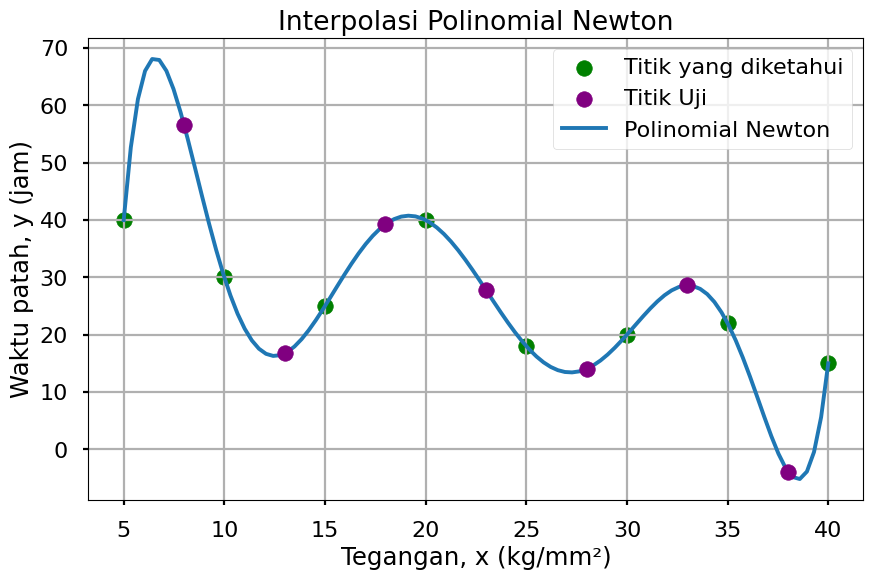

In [36]:
# visualisasi
plt.figure(figsize=(10, 6))

plt.scatter (x,y,color="green", label="Titik yang diketahui")
plt.scatter(x_dep,y_dep, color="purple", label="Titik Uji", zorder=5)
plt.plot (x_garis, y_garis, label= 'Polinomial Newton')
plt.title('Interpolasi Polinomial Newton')
plt.xlabel('Tegangan, x (kg/mm²)')
plt.ylabel('Waktu patah, y (jam)')
plt.grid(True)